grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -22.2 to -22.2003977123
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -21.6 to -21.5998180555
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 64 to 63.9996577865
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 64.2 to 64.2002047037


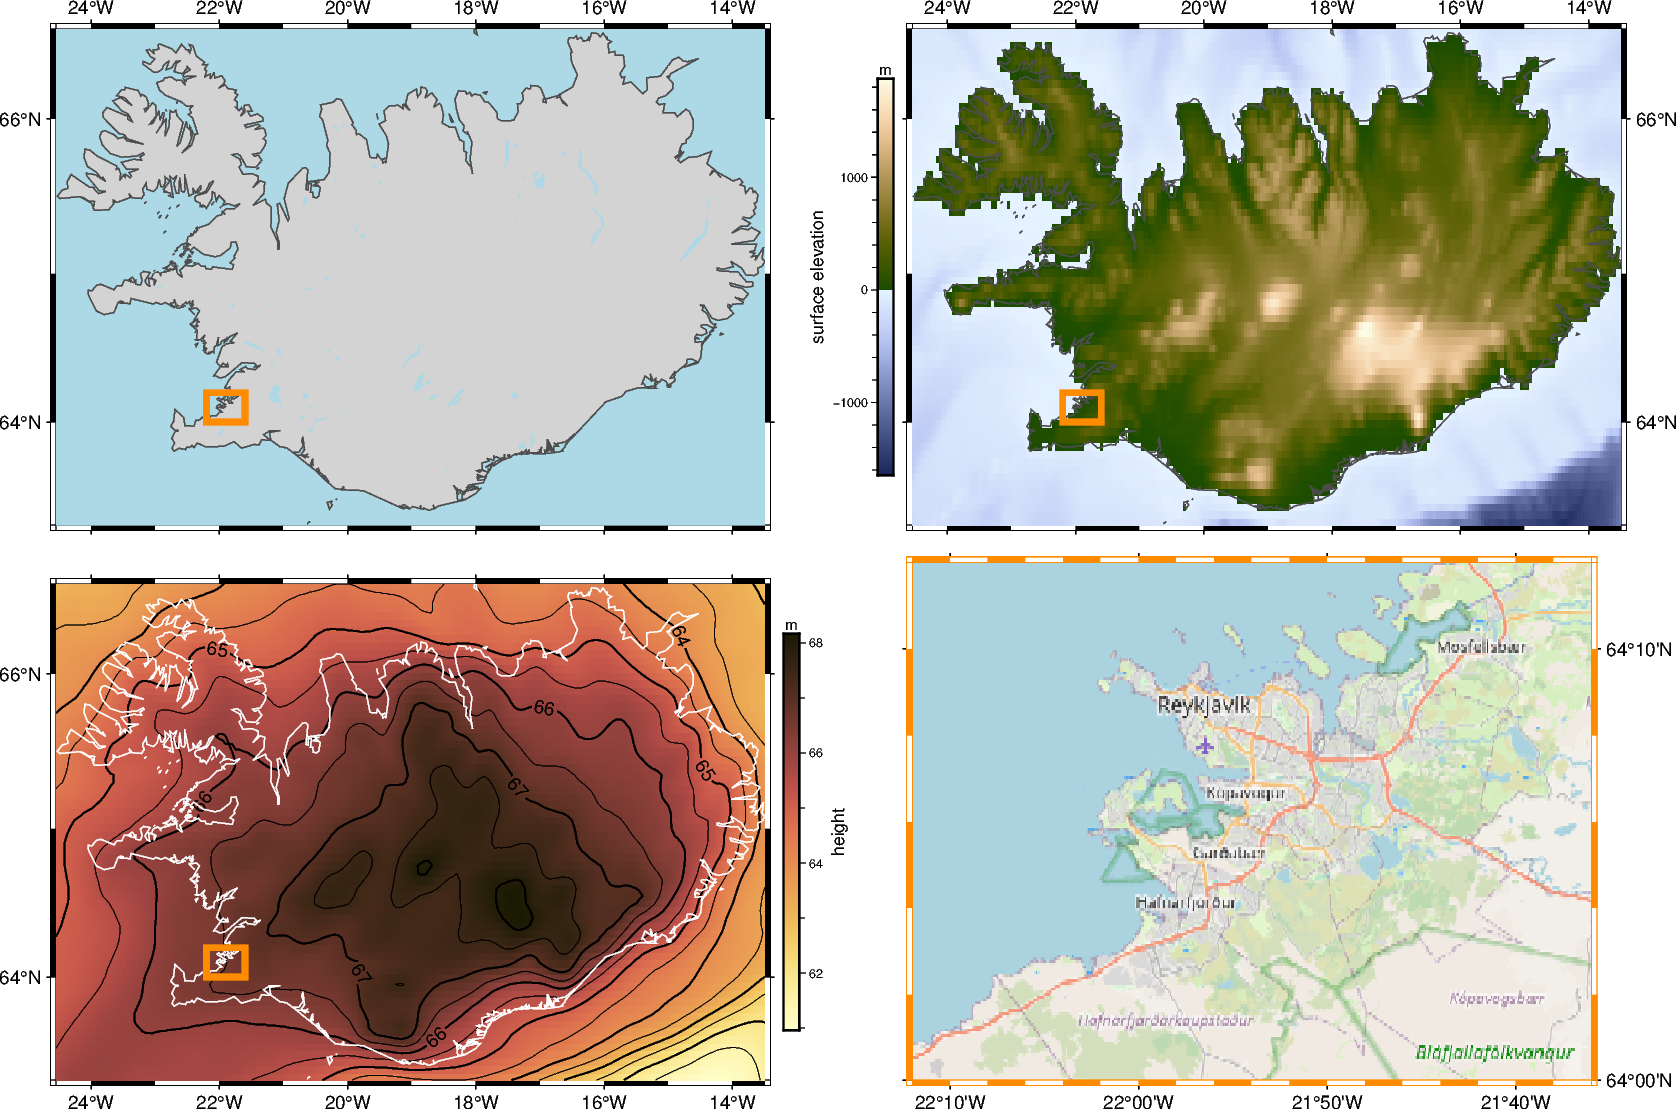

In [1]:
import pygmt


region_main = "IS"  # country code for Iceland ("IS")
args_base = {"region":region_main, "projection":"M12c"}
args_grid = {"resolution":"03m", "region":region_main}

lon_min = -22.2
lon_max = -21.6
lat_min = 64
lat_max = 64.2
region_rect = [lon_min, lon_max, lat_min, lat_max]
x = [lon_min, lon_max, lon_max, lon_min, lon_min]
y = [lat_min, lat_min, lat_max, lat_max, lat_min]
args_rect = {"x":x, "y":y, "pen":"3p,darkorange"}


fig = pygmt.Figure()

# -----------------------------------------------------------------------------
# TOP LEFT
fig.basemap(frame=["WsNe", "af"], **args_base)
fig.coast(land="lightgray", water="lightblue", shorelines="1/0.5p,gray30")
fig.plot(**args_rect)

fig.shift_origin(xshift="w+2.5c")

# -----------------------------------------------------------------------------
# TOP RIGHT
fig.basemap(frame=["wsNE", "af"], **args_base)
# Download 3 arc-minutes Earth relief grid
grid_relief = pygmt.datasets.load_earth_relief(**args_grid)
fig.grdimage(grid=grid_relief, cmap="SCM/oleron")
fig.colorbar(frame=["x+lsurface elevation", "y+lm"], position="JLM")
fig.coast(shorelines="1/0.5p,gray30")
fig.plot(**args_rect)

fig.shift_origin(xshift="-w-2.5c", yshift="-h-1c")

# -----------------------------------------------------------------------------
# BOTTOM LEFT
fig.basemap(frame=["WSne", "af"], **args_base)
# Download 3 arc-minutes Earth crustal age grid
#grid_age = pygmt.datasets.load_earth_age(**args_grid)
#fig.grdimage(grid=grid_age, cmap="SCM/lajolla")
#fig.grdcontour(grid=grid_age)
#fig.colorbar(frame=["x+lcrustal age", "y+lMyr"], position="JRM")
#fig.coast(shorelines="1/0.5p,gray30")
#fig.plot(**args_rect)
# OR
# Download 3 arc-minutes Earth geoid grid
grid_geoid = pygmt.datasets.load_earth_geoid(**args_grid)
fig.grdimage(grid=grid_geoid, cmap="SCM/lajolla")
fig.grdcontour(grid=grid_geoid)
fig.colorbar(frame=["x+lheight", "y+lm"], position="JRM")
fig.coast(shorelines="1/0.5p,white")
fig.plot(**args_rect)

fig.shift_origin(xshift="+w+2.5c")

# -----------------------------------------------------------------------------
# BOTTOM RIGHT
pygmt.config(MAP_FRAME_PEN="darkorange")
fig.tilemap(
    region=region_rect,  # Area around Reykjavik
    projection="M11.5c",
    # Set level of details (0-22)
    # Higher levels mean a zoom level closer to the Earth's surface with
    # more tiles covering a smaller geographic area and thus more details
    # and vice versa. Please note, not all zoom levels are always available.
    zoom=10,
    # Use tiles from OpenStreetMap tile server
    source="https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
    frame=["wSnE", "af"],
)

fig.show(dpi=150)

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -22.2 to -22.2003977123
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -21.6 to -21.5998180555
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 64 to 63.9996577865
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 64.2 to 64.2002047037


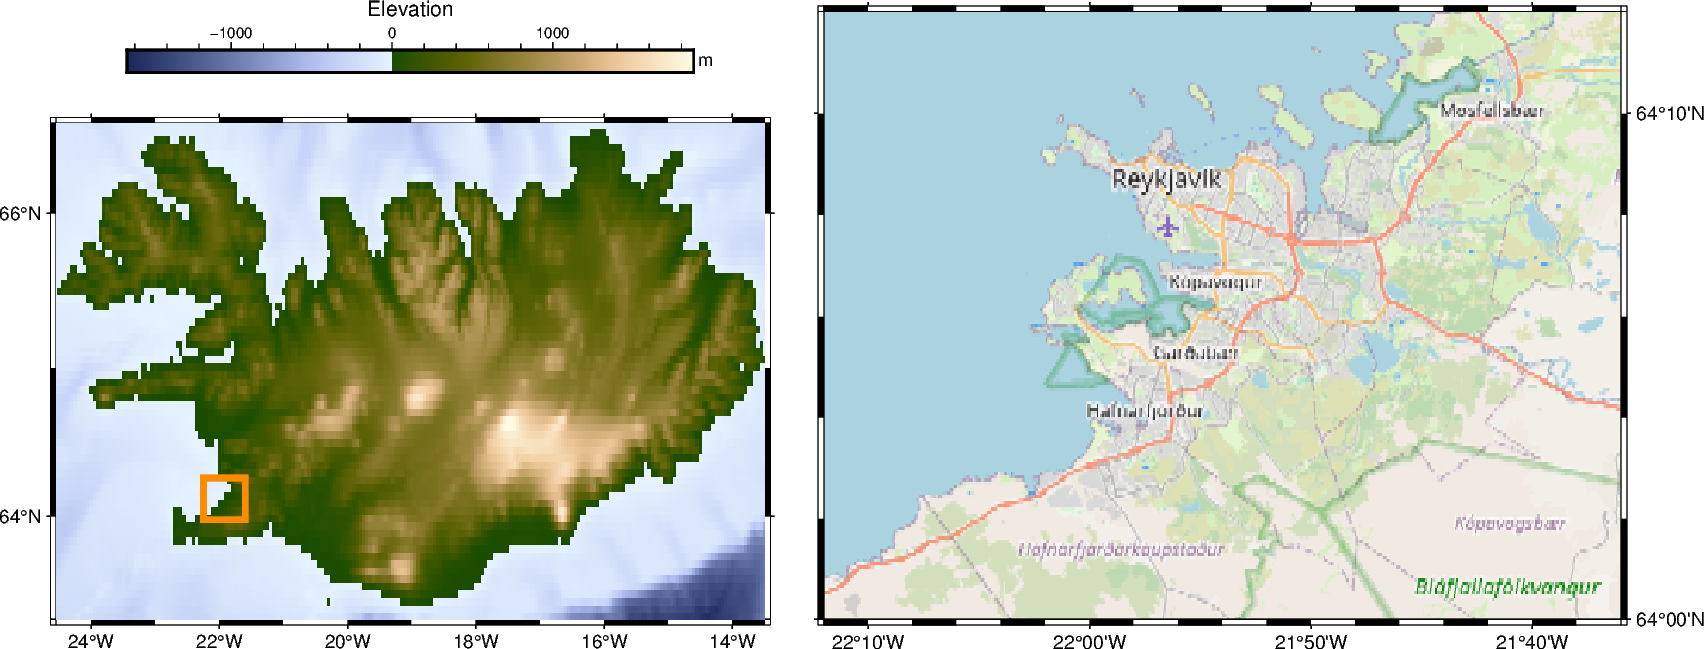

In [2]:
import pygmt

fig = pygmt.Figure()

fig.basemap(region="IS", projection="M12c", frame="af")
# Download 3 arc-minutes Earth relief using the country code for Iceland ("IS")
grid = pygmt.datasets.load_earth_relief(resolution="03m", region="IS")
fig.grdimage(grid=grid, cmap="SCM/oleron")
fig.colorbar(frame=["x+lElevation", "y+lm"], position="JTC+h")
fig.plot(x=-21.92, y=64.12, style="s1c", pen="3p,darkorange")

fig.shift_origin(xshift="w+1c")

fig.tilemap(
    region=[-22.2, -21.6, 64, 64.2],  # Area around Reykjavik
    projection="M13.5c",
    # Set level of details (0-22)
    # Higher levels mean a zoom level closer to the Earth's surface with
    # more tiles covering a smaller geographic area and thus more details
    # and vice versa. Please note, not all zoom levels are always available.
    zoom=10,
    # Use tiles from OpenStreetMap tile server
    source="https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
    frame=["wSnE", "af"],
)

fig.show(dpi=150)